---
# Seaborn
---

Author: Dr. Julia Jerke, University of Zurich  
Date: December 9, 2021  
contact: jerke@soziologie.uzh.ch





## Overview:
1. Introduction to Seaborn
2. Plotting categorical data
3. Plotting continuous data
4. Visualization of relationships
5. 3D plots and animation

---
---
---

# 1. Introduction to Seaborn

Seaborn is a comprehensive library for creating impressive visualizations in Python. It is based on the matplotlib library and closely builds on Pandas. In contrast to matplotlib, it also performs the mapping of data and statistical aggregations that are necessary to draw a plot.

Website: https://seaborn.pydata.org/index.html

- Example gallery
- Tutorials
- Documentation
- ...


### 1 - Types of graphs in Seaborn

In contrast to Matplotlib, Seaborn does most of the work for us. We do not have to specify every single element that we want to plot in a graph. Rather, we can draw on readily available figure "templates".

Seaborn enables four major figure structures:

1. **Relational plots**: plotting relationships
2. **Distribution plots**: plotting the distribution of a continuous variable
3. **Categorical plots**: plotting the distribution of a discrete variable
4. **Multi-perspective plots**: plotting different apsects of the data in one, e.g. marginal distributions

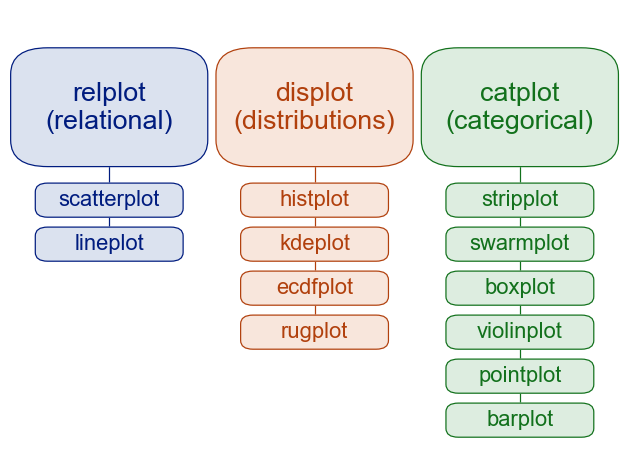

For the relational, distribution as well as categorical plots there exist two ways to create a plot:
- First option - **figure-level plots**: Using the principal plot group, such as `relpot`, `displot` or `catplot`, we have to specify what kind of plot is to be drawn by setting the `kind` parameter. For instance: `sns.relplot(x=x,y=y,kind="scatter")`
- Second option - **axes-level plots**: Using the subgroup plot functions, we can directly specify the plot to be drawn. For instance: `sns.scatterplot(x=x,y=y)`

Though both options enable to draw the graph, they are related to different possibilities to customize the figure. See the documentation for a detailed explanation of the differences between these two plotting alternatives: https://seaborn.pydata.org/tutorial/function_overview.html

### 2 - Importing the seaborn module

In [1]:
# Install the module via the console or the Anaconda navigator if it is not already installed

# Import the module
import seaborn as sns

# 2. Plotting categorical data

To plot categorical data, we can use the `sns.catplot()` function. By using the parameter `kind`, we can specifiy the type of catplot we want to draw. There are different options for different purposes:

- **Univariate distribution**: we can plot a very basic graph for the distribution of a single categorical variable
    - `kind="count"` (or explicitly with `sns.countplot()`) and specify only a variable _x_
- **Distribution over various categories**: we can plot the distribution of a second variable over the categories of another variable. Therefore, we always have to specify a variable _x_ over whose categories we want to plot the distribution of another variable _y_. 
    - `kind="strip"` (or explicitly with `sns.stripplot()`)
    - `kind="swarm"` (or explicitly with `sns.swarmplot()`)
    - `kind="box"` (or explicitly with `sns.boxplot()`)
    - `kind="boxen"` (or explicitly with `sns.boxenplot()`)
    - `kind="violin"` (or explicitly with `sns.violinplot()`)
- **Statistical aggregation over various categories**: we can plot the mean, the median or another statistical aggregation function for a certain variable _y_ over the categories of a second variable _x_ by specifying:
    - `kind="bar"` (or explicitly with `sns.barplot()`) and specify a variable _y_ for which you want to do the aggregation
    - `kind="point"` (or explicitly with `sns.pointplot()`) 

For all plots we can group data over another categorical variable by defining the parameter `hue` or plot different graphs by setting the parameter `col`.

### 1 - Loading the data set

For that part we will be using the data from the world happiness report again.

In [2]:
import pandas as pd

happy = pd.read_csv("world_happiness_2019.csv")

happy.develop.replace([0,1],[1,0],inplace=True)

happy.rename(columns={"develop": "developed"},inplace=True)

happy.head()

,Unnamed: 0,rank,country,score,gdp,support,life,choices,generosity,corruption,continent,developed
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,1.0
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,1.0
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,1.0
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,1.0
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,1.0


### 2 - Univariate categorical plots

We can draw a univariate categorical plot using the principle plotting group `sns.catplot()` and specifying `kind="count"`in the parameters.

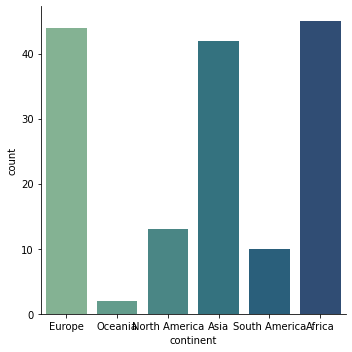

In [3]:
sns.catplot(x="continent",data=happy,kind="count",palette="crest")

To change the size of the figure, we use the `aspect` parameter:

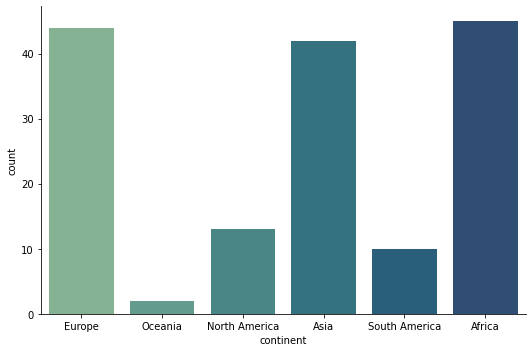

In [4]:
sns.catplot(x="continent",data=happy,kind="count",palette="crest",aspect=1.5)

We can change the order of the bars with the `order` parameter. Using that parameter, we can pass an ordered list with our categories. Note: the items in the list have to match the categories of _x_.

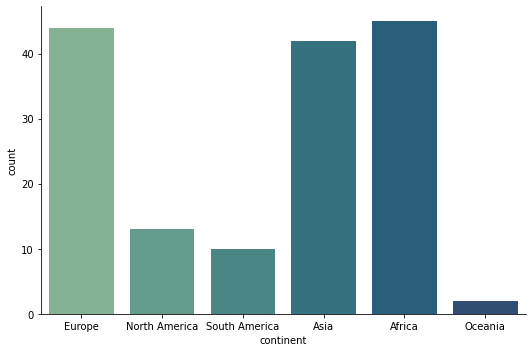

In [5]:
sns.catplot(x="continent",data=happy,kind="count",palette="crest"
            ,aspect=1.5,order=["Europe","North America","South America","Asia","Africa","Oceania"])

We can plot a grouped countplot by specifying a grouping variable with the parameter `hue`. Seaborn then also automatically plots a legend for the grouping variable.

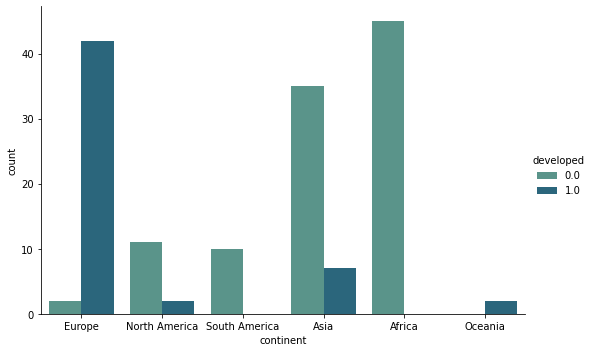

In [6]:
sns.catplot(x="continent",hue="developed",data=happy,kind="count",palette="crest",
            aspect=1.5,order=["Europe","North America","South America","Asia","Africa","Oceania"])

If we want to instead draw two separate graphs for developed and developing countries, we have to specify the parameter `col` instead of `hue`.

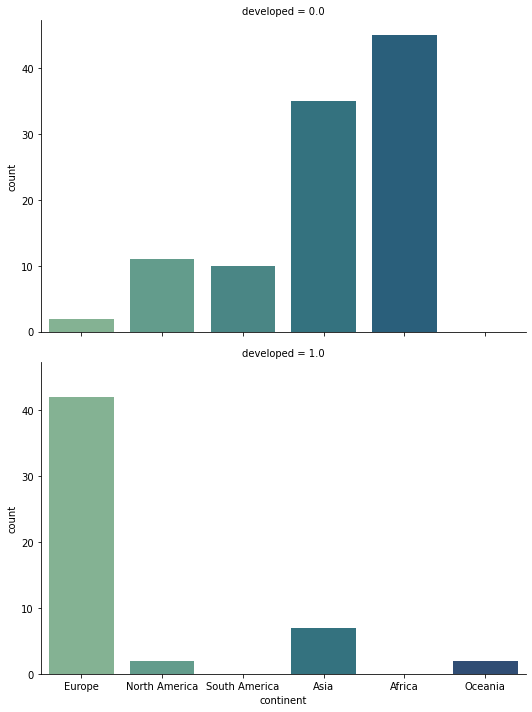

In [7]:
sns.catplot(x="continent",row="developed",data=happy,kind="count",palette="crest",
            aspect=1.5,order=["Europe","North America","South America","Asia","Africa","Oceania"])

Note, that Seaborn indeed does most of the work for us. We do not have to specify axis labels or define a legend. Further, Seaborn automatically groups the plots or draws separate suplots.

If we want th change, however, more specific details, we usually have to initialize the plot as a figure object. This can either be done by specifying 

`fig = sns.catplot(...)` 

or by  

`fig, ax = plt.subplots()`  
`sns.countplot()`

Note that in the latter case we draw an **axes-level plot**. We then have to use the specific subgroup plot, hence `countplot()` instead of `catplot()`.

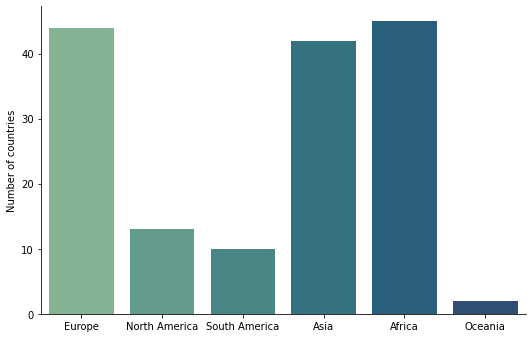

In [8]:
fig1 = sns.catplot(x="continent",data=happy,kind="count",palette="crest"
            ,aspect=1.5,order=["Europe","North America","South America","Asia","Africa","Oceania"])
fig1.set_axis_labels("","Number of countries")

Text(0.5, 1.0, 'Countries by continent')

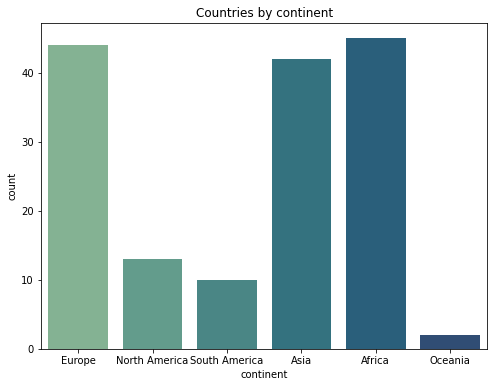

In [9]:
import matplotlib.pyplot as plt

fig2, ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="continent",data=happy,palette="crest",
            order=["Europe","North America","South America","Asia","Africa","Oceania"])
ax.set_title("Countries by continent")

### 3 - Plotting the distribution of a second variable over the categories of another variable

We can also process bivariate information by plotting the distribution of a (continuous) variable for different categories of another variable. We have various possibilities for that, which we can even combine. We can draw on plots such as stripplots, swarmplots, boxplots or violinplots

In this section we want to, among others, plot the distribution of the happiness score (variable _score_) for developed and developing countries (variable _develop_).

#### Stripplot

A stripplot draws a scatter plot for _y_ over different categories of _x_. We can use the parameter `jitter` to decided how much random dispersion we want to define for our plot.

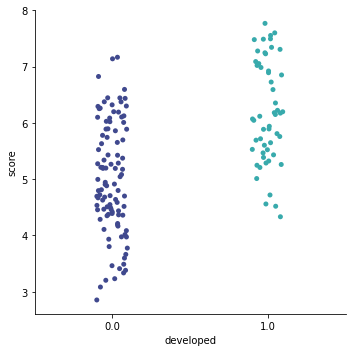

In [10]:
sns.catplot(x="developed",y="score",data=happy,kind="strip",palette="mako")

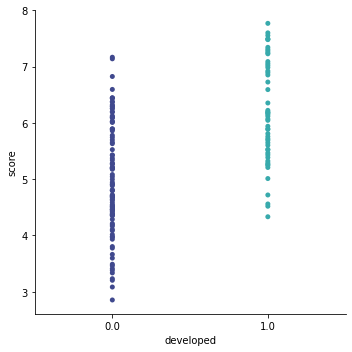

In [11]:
sns.catplot(x="developed",y="score",data=happy,kind="strip",palette="mako",jitter=False)

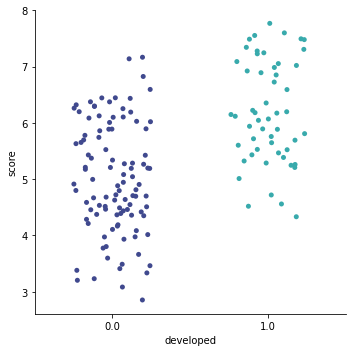

In [12]:
sns.catplot(x="developed",y="score",data=happy,kind="strip",palette="mako",jitter=0.25)

### 4 - Combining plot types

We can even combine plot types. Therefore, we have to instantiate a matplotlib figure object on which we then draw several seaborn plots. For instance we can draw a boxplot and also add the raw distribution with a stripplot. Note that in this case we cannot use `catplot` since we now plot an the axes of a prespecified axes object

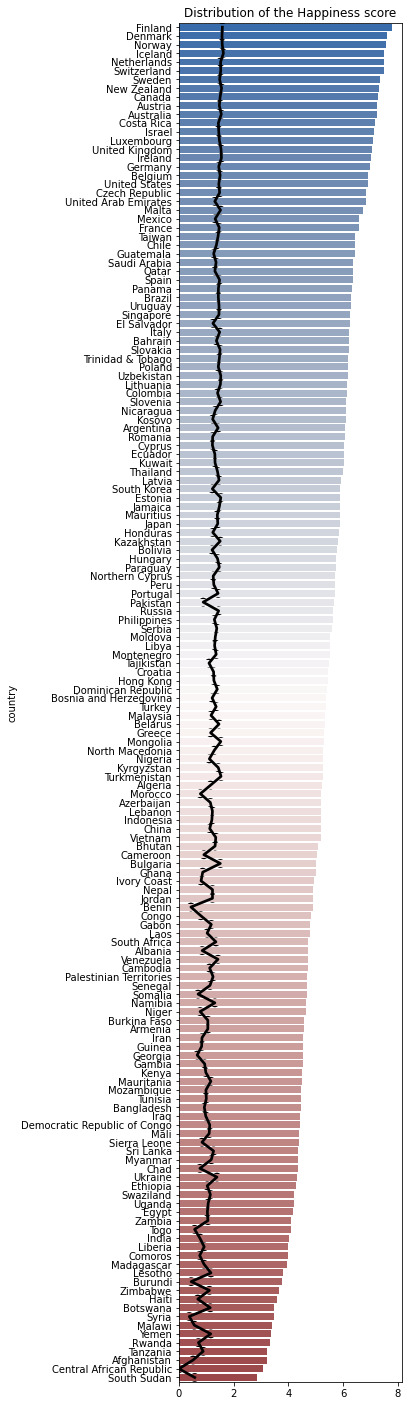

In [13]:
fig, ax = plt.subplots(figsize=(4,25))

sns.barplot(x="score",y="country",data=happy,palette="vlag",label="Happiness score")
sns.pointplot(x="support",y="country",data=happy,color="black",label="Social support")

ax.set_title("Distribution of the Happiness score")
ax.set_xlabel("");

<AxesSubplot:xlabel='developed', ylabel='score'>

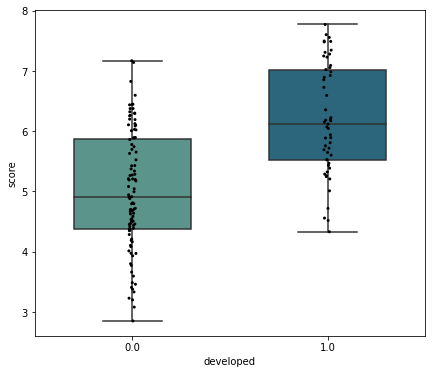

In [14]:
fig, ax = plt.subplots(figsize=(7, 6))

# Plot the happiness score with horizontal boxes
sns.boxplot(x="developed", y="score", data=happy,
            whis=[0, 100], width=.6, palette="crest")

# Add in points to show each observation
sns.stripplot(x="developed", y="score", data=happy,color="black",size=3,jitter=0.02)

#### Customizing the plot

- Use the parameter `orient` to turn the boxplot in horizontal position (note, that you also have to switch x and y for that)
- Use `whis` to indicate the range outside which outliers should be indicated. Therefore, pass a list with a lower and upper boundary in absolut terms (between 0 and 100, inclusive).
- Use `fliersize` to determine the size of the outlier markers. Choose 0, if you do not want to plot outliers.
- Use `width` to determine the width of the boxplots

<AxesSubplot:xlabel='score', ylabel='continent'>

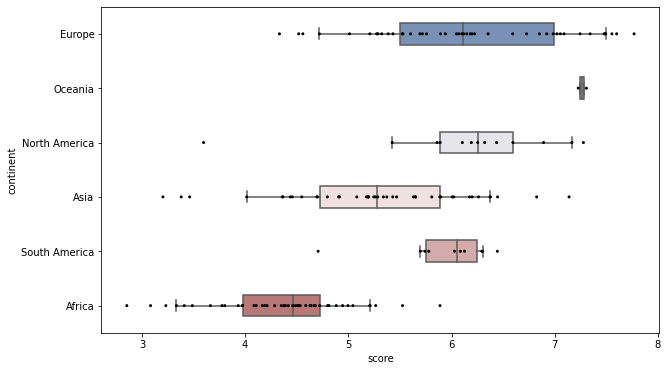

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the happiness score with horizontal boxes
sns.boxplot(x="score", y="continent", data=happy,whis=[5, 95],fliersize=0,width=.4, palette="vlag",orient="h")

# Add in points to show each observation
sns.stripplot(x="score", y="continent", data=happy,color="black",size=3,jitter=False,orient="h")

# 3. Plotting continuous data

To plot continuous data, we can use the `sns.displot()` function. By using the parameter `kind`, we can again specifiy the type of displot we want to draw. There are different options:

- `kind="hist"` (or explicitly with `sns.histplot()`) for a histogram
- `kind="kde"` (or explicitly with `sns.kdeplot()`) for a kernel density plot (i.e. a smoothed histogram)
- `kind="ecdf"` (or explicitly with `sns.ecdfplot()`) to plot the cumulative distribution
- `rugplot()` to plot marginal distributions, it usually complements other plots

As before, we can group data over another categorical variable by defining the parameter `hue` or plot different graphs by setting the parameter `col`.

### 1 - Univariate distribution

#### Histogram

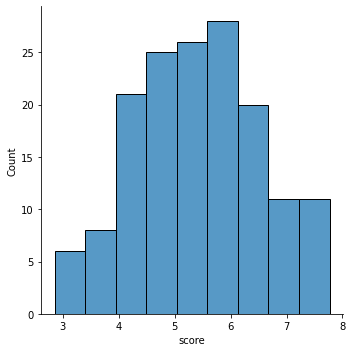

In [16]:
sns.displot(x="score",data=happy,kind="hist")

We can change the number of bins by either specifying the bin width using the parameter `binwidth` or by setting the number of bins using the parameter `bins`.

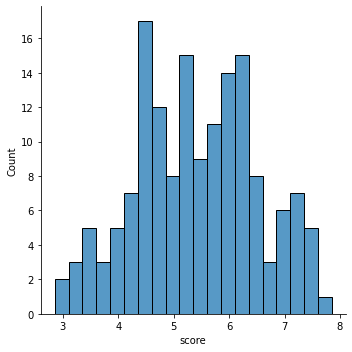

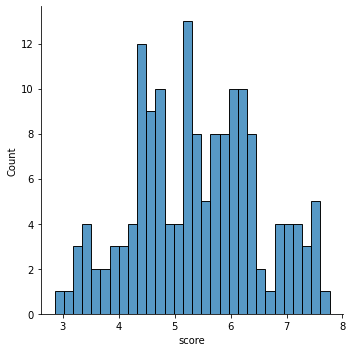

In [17]:
sns.displot(x="score",data=happy,kind="hist",binwidth=0.25)
sns.displot(x="score",data=happy,kind="hist",bins=30)

#### Kernel density plots

Using kde-plots, we can draw a smoothed histogram line that shows the characteristic features of a distribution. Using the parameter `bw_adjust` we can determine how smooth the density estimate should be.

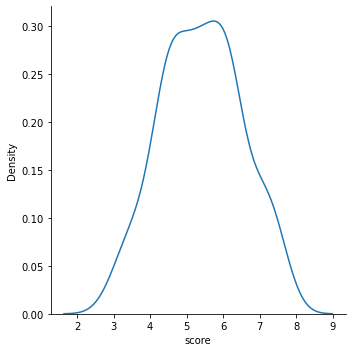

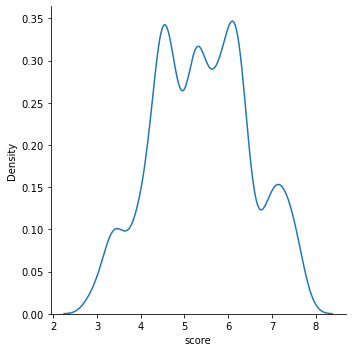

In [18]:
sns.displot(x="score",data=happy,kind="kde",bw_adjust=1)
sns.displot(x="score",data=happy,kind="kde",bw_adjust=0.5)

<AxesSubplot:xlabel='score', ylabel='Density'>

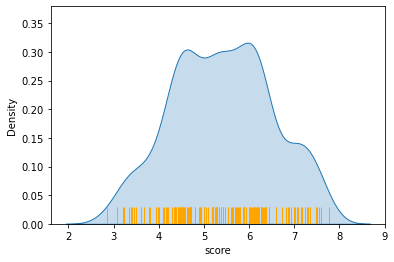

In [19]:
fig, ax = plt.subplots()
sns.kdeplot(x="score",data=happy,bw_adjust=0.75,fill=True)
sns.rugplot(x="score",data=happy,height=0.075,color="orange")

### 2 - Grouped distribution

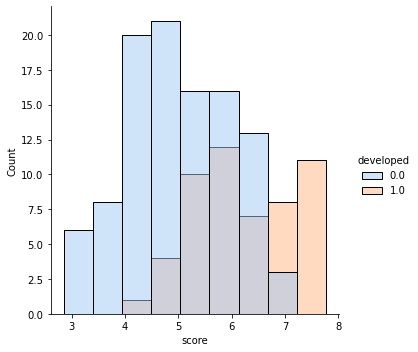

In [20]:
sns.set_palette("pastel")

sns.displot(x="score",hue="developed",data=happy)

The histogram bars overlap for the two different kind of countries. We can avoid the overlap by specifying `multiple="dodge"` in the parameters.

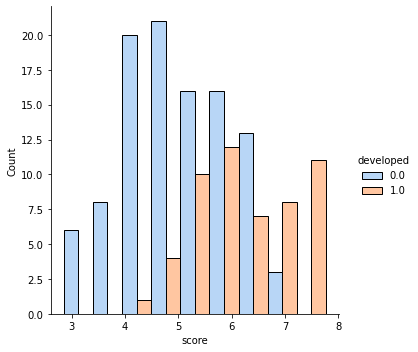

In [21]:
sns.displot(x="score",hue="developed",data=happy,multiple="dodge")

We can also draw separate graphs by specifying the `col` parameter instead of `hue`.

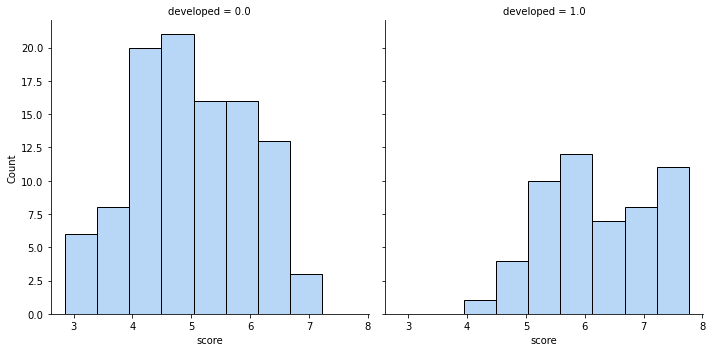

In [22]:
sns.displot(x="score",col="developed",data=happy)

We can also draw the kde plots for various categories of another variable in the same plot.

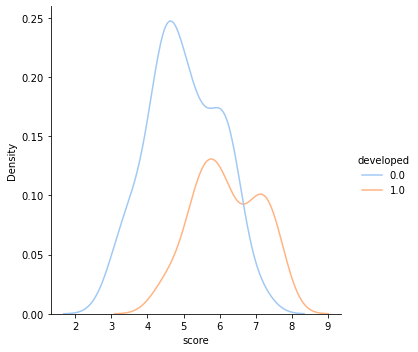

In [23]:
sns.displot(x="score",hue="developed",data=happy,kind="kde")

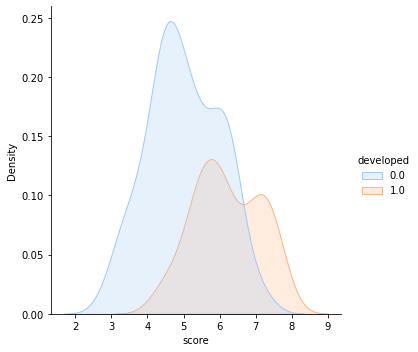

In [24]:
sns.displot(x="score",hue="developed",data=happy,kind="kde",fill=True)

`displot` even allows to combine a histogram with a kernel density estimate to use the advantages of both plot types. We, therefore, have to specify the parameter `kde=True`.

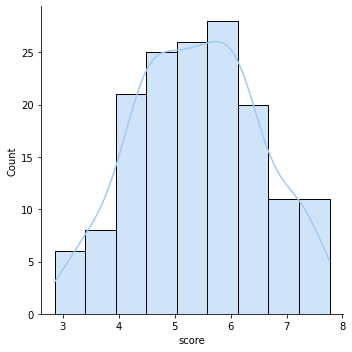

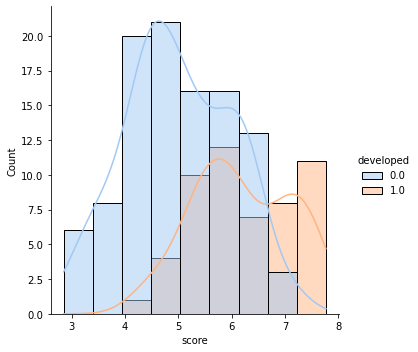

In [25]:
sns.displot(x="score",data=happy,kde=True)
sns.displot(x="score",hue="developed",data=happy,kde=True)

# 4. Visualization of relationships

Relationships between continuous variables can be easily plotted with the `relplot` plotting group. It has the subgroup parameters `kind="scatter"` (or `sns.scatterplot()`) for  scatter plots or `kind="line"` (or `sns.lineplot()`) for line plots.

### 1 - Basic scatter plots

With `sns.relplot(x,y,kind="scatter"`) or `sns.scatterplot(x,y)` we can plot bivariate scatterplots. As before we have the option to color points according to another variable using the parameter `hue`. Also we can make the size and the style of the markers dependent on the value of another variable using the parameter `size` and `style`.

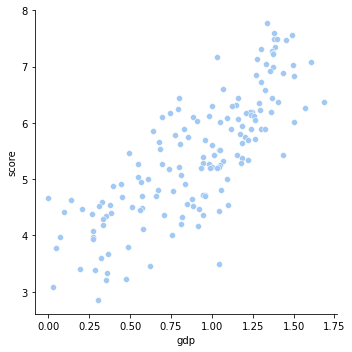

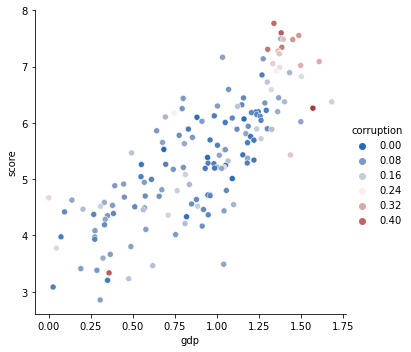

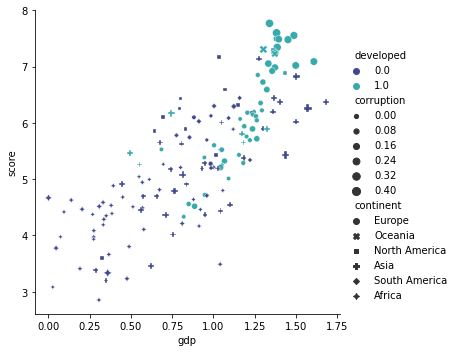

In [26]:
sns.relplot(x="gdp",y="score",data=happy,kind="scatter")
sns.relplot(x="gdp",y="score",data=happy,hue="corruption",palette="vlag")
sns.relplot(x="gdp",y="score",data=happy,hue="developed",style="continent",size="corruption",palette="mako")


### 2 - Advanced methods to plot continuous relationships

####  Adding marginal distributions using `jointplot`

Documentation: https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

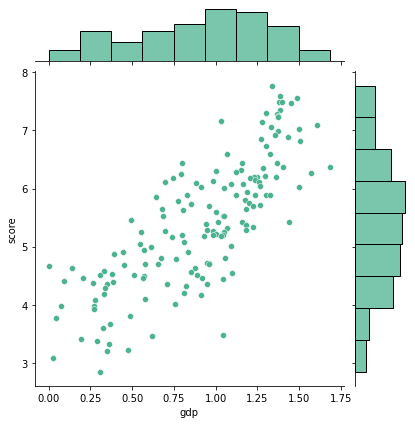

In [27]:
sns.jointplot(x="gdp", y="score", data=happy,  color="#4CB391")

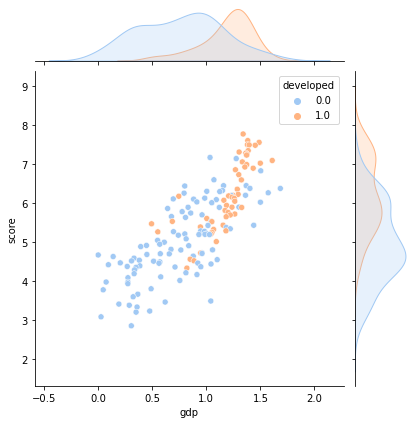

In [28]:
sns.jointplot(data=happy, x="gdp", y="score", hue="developed")

#### Plotting pairwise scatters using `pairplot`

Documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [29]:
happy_pair = happy.drop(columns=["Unnamed: 0","rank","country","continent","developed"])
#sns.pairplot(happy_pair)

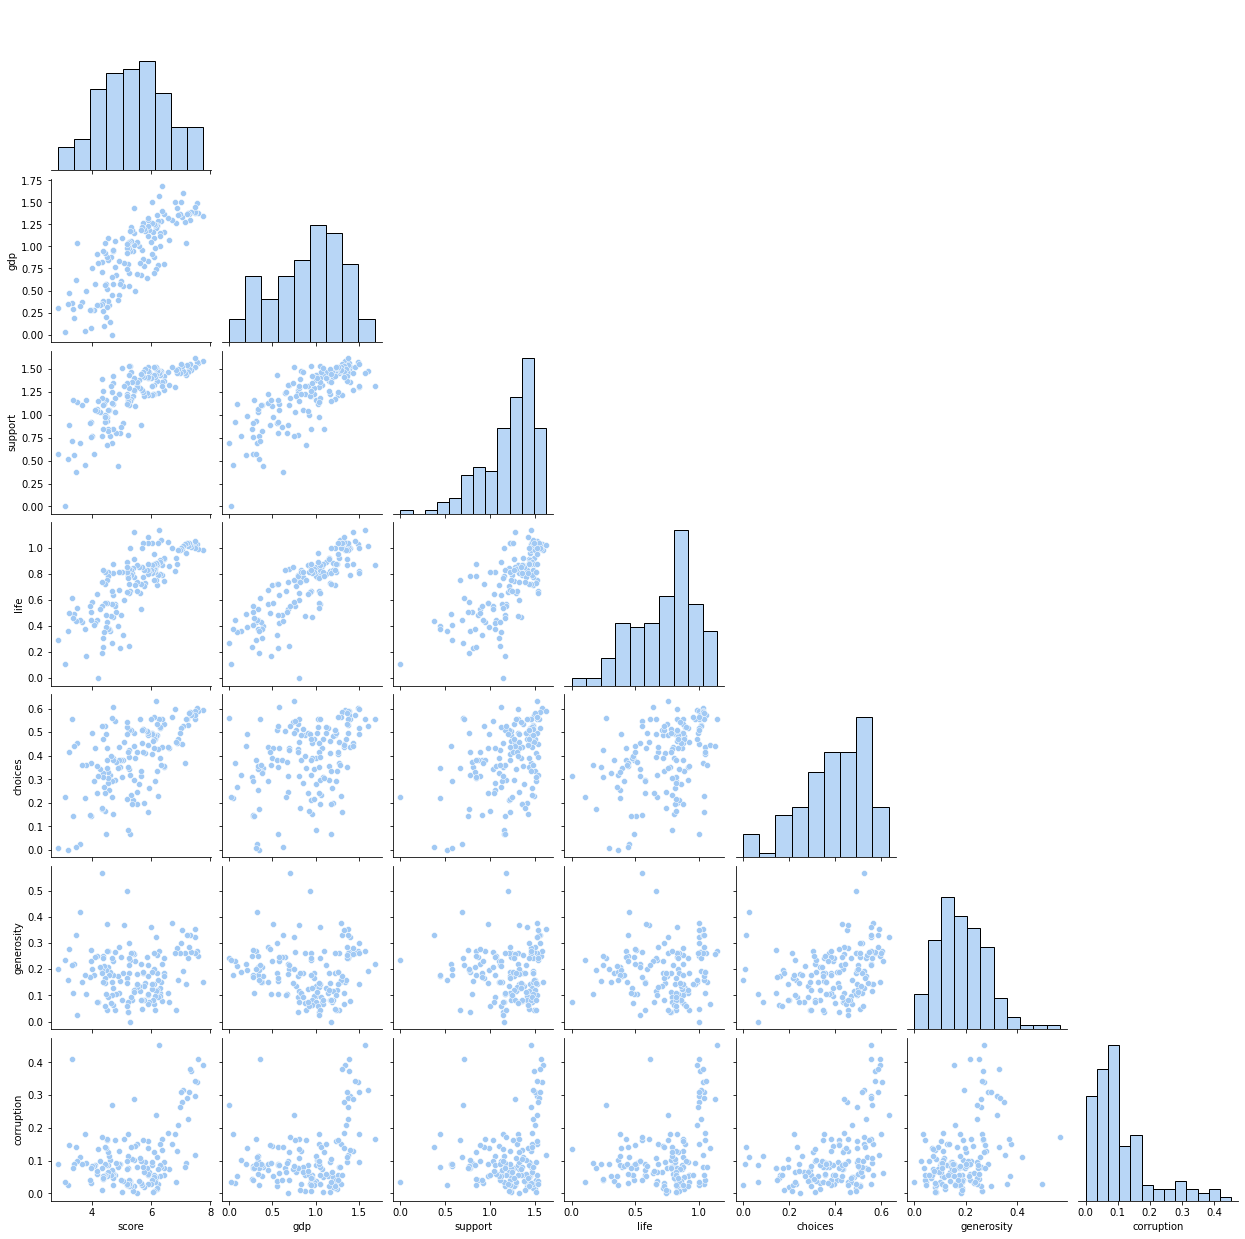

In [30]:
happy_pair = happy.drop(columns=["Unnamed: 0","rank","country","continent","developed"])
sns.pairplot(happy_pair,corner=True)

#### Plotting correlations with `heatmap`

Documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

               score       gdp   support      life   choices  generosity  \
score       1.000000  0.793883  0.777058  0.779883  0.566742    0.075824   
gdp         0.793883  1.000000  0.754906  0.835462  0.379079   -0.079662   
support     0.777058  0.754906  1.000000  0.719009  0.447333   -0.048126   
life        0.779883  0.835462  0.719009  1.000000  0.390395   -0.029511   
choices     0.566742  0.379079  0.447333  0.390395  1.000000    0.269742   
generosity  0.075824 -0.079662 -0.048126 -0.029511  0.269742    1.000000   
corruption  0.385613  0.298920  0.181899  0.295283  0.438843    0.326538   

            corruption  
score         0.385613  
gdp           0.298920  
support       0.181899  
life          0.295283  
choices       0.438843  
generosity    0.326538  
corruption    1.000000  


<AxesSubplot:>

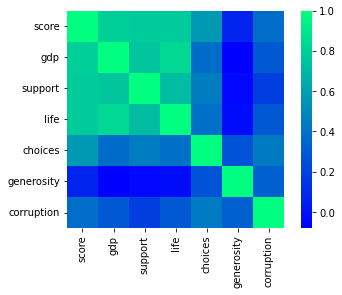

In [31]:
corr = happy_pair.corr()
print(corr)
sns.heatmap(corr,vmax=1,square=True,cmap="winter")

We can omit the correltations from the main diagonal and the upper triangle by defining a mask variable.

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


<AxesSubplot:>

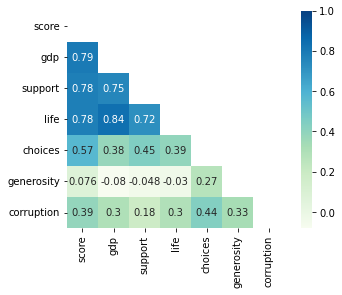

In [32]:
import numpy as np
triangle = np.zeros_like(corr) # creating a matrix with the same dimensions as mask but with only zeros
print(triangle)
triangle[np.triu_indices_from(triangle)] = 1 # setting all values in the upper triangle to 1 (or True)
print(triangle)
sns.heatmap(corr,mask=triangle,vmax=1,square=True,annot=True,cmap="GnBu") # data will not be shown in cells where mask is True or 1

### 3 - Plotting regression results

Remember how tricky it has been to plot regression results (e.g. the regression line and confidence intervals) with matplotlib? 

`Seaborn` offers very convenient solutions for visualizing regression results. You may therefore have a look at the tutorial on their webpage: https://seaborn.pydata.org/tutorial/regression.html



In [33]:
import statsmodels.formula.api as smf


In [34]:
# Describing the model
model = smf.ols("score ~ gdp", data = happy)

# Fitting the model
results = model.fit()

In [35]:
# Saving the predicted values and the residuals to a new variable
happy["predicted"] = results.fittedvalues
happy["resid"] = results.resid

# Calculating the confidence intervals
prediction = results.get_prediction()
ci_lower = prediction.summary_frame()["mean_ci_lower"] # Access the lower value of the CI
ci_upper = prediction.summary_frame()["mean_ci_upper"] # Access the upper value of the CI

# Save the two values of the CI into a new data frame and append it to our existing data frame
conf_int = pd.DataFrame({"lower": ci_lower,"upper": ci_upper})
happy = happy.join(conf_int)

In [36]:
happy.sort_values(by=["gdp"],inplace=True)

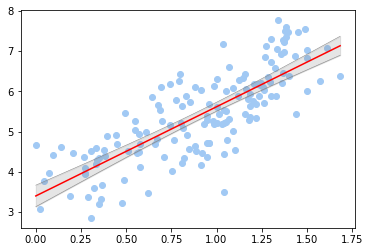

In [37]:
# Initializing a figure object with one axes
fig, ax = plt.subplots()

# Adding the scatter plot for the happiness score and the gdp
ax.scatter(happy.gdp, happy.score)

# Adding a line plot for the predicted happiness score
ax.plot(happy.gdp, happy.predicted,color="red")

# Adding the two lines for the lower and upper confidence interval
ax.plot(happy.gdp, happy.lower,color="gray",linewidth=0.5)
ax.plot(happy.gdp, happy.upper,color="gray",linewidth=0.5)

# Adding the confidence band
# the first value indicates the x coordinate, the other values indicate the coordinates of the lower and upper limit
# alpha is the transparency and ranges between 0 and 1
ax.fill_between(happy.gdp,happy.lower,happy.upper,color="gray",alpha=0.2)

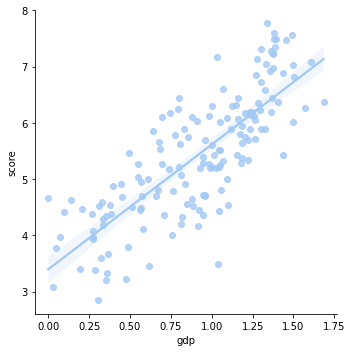

In [38]:
sns.lmplot(data=happy, x="gdp", y="score")

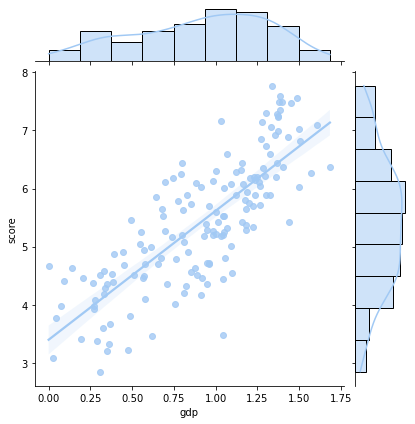

In [39]:
sns.jointplot(data=happy, x="gdp", y="score", kind="reg")

# 5. 3D and animated figures

### Visualizing the basic principle of the principal component analysis

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
# Selecting and standardizing the relvant variables
happy_lca = happy[["score","gdp","life"]]
scaler = StandardScaler()
scaled_happy = scaler.fit_transform(happy_lca)

In [42]:
# Conducting the principal component analysis
pca = PCA(n_components=2)
pca.fit(scaled_happy);

In [43]:
# Creating a data frame with the reduced data

# Transforming the 3-dimensional data into 2-dimensional data
happy_pca_2d = pca.transform(scaled_happy)

# Re-transforming the reduced data into the 3-dimensional space
happy_pca_3d = pca.inverse_transform(happy_pca_2d)

happy_pca_3d_df = pd.DataFrame(happy_pca_3d,columns=["score","gdp","life"])
happy_pca_3d_df.head()


,score,gdp,life
0,-0.707460,-1.976995,-2.157982
1,-2.070665,-2.389193,-2.417159
2,-1.526017,-1.760774,-1.781385
3,-1.359921,-1.589234,-1.610573
4,-0.936914,-1.710028,-1.815581


In [44]:
# Creating a data frame with the original and standardized data
happy_scaled_df = pd.DataFrame(scaled_happy,columns=["score","gdp","life"])
happy_scaled_df.head()

,score,gdp,life
0,-0.666125,-2.279334,-1.894551
1,-2.094636,-2.213861,-2.569928
2,-1.470958,-2.163497,-1.430488
3,-1.290704,-2.095506,-1.169453
4,-0.891442,-2.042624,-1.525787


Now that we have all the data together, we can plot the original data as well as the reduced data in a 3 dimensional scatter plot. Seaborn does not offer the possibility to plot 3D graphs. However, we can draw on matplotlib and customize the plot with seaborn style.

<IPython.core.display.Javascript object>


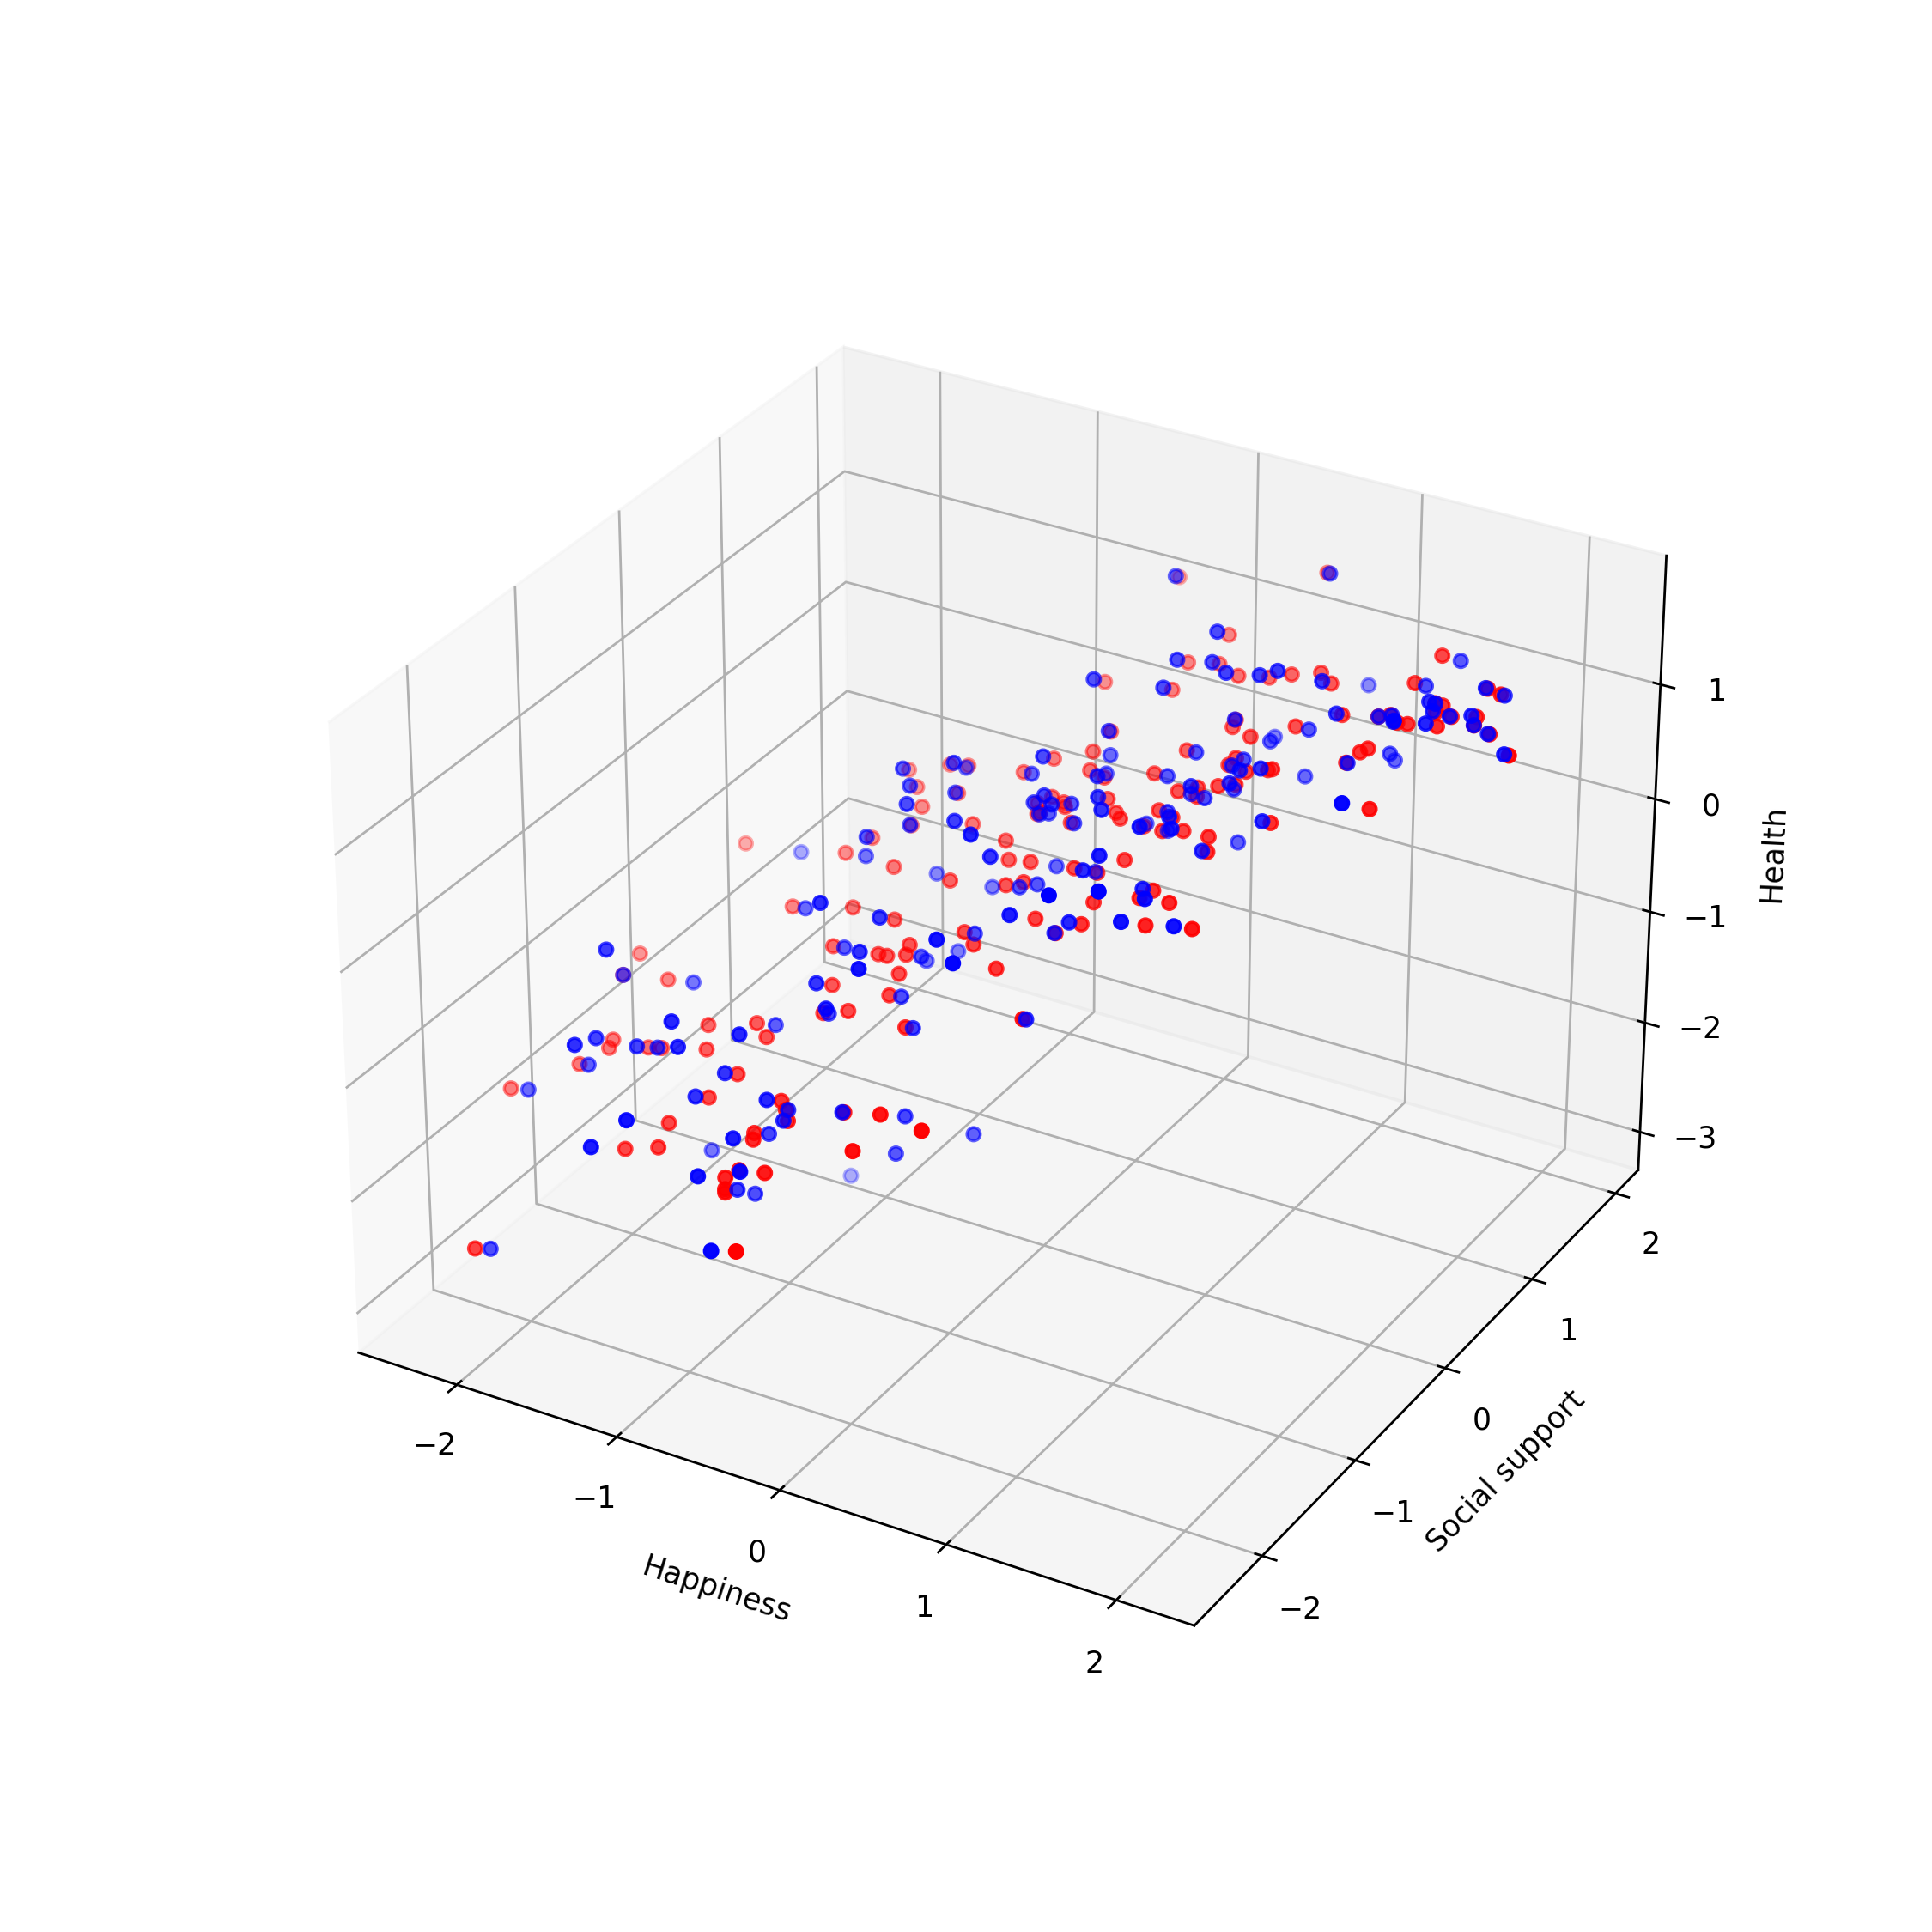

Text(0.5, 0, 'Health')

In [45]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

# Definition of the variables that we are going to use for the plot
# Original data
x1 = happy_scaled_df['score']
y1 = happy_scaled_df['gdp']
z1 = happy_scaled_df['life']
# Reduced data
x2 = happy_pca_3d_df['score']
y2 = happy_pca_3d_df['gdp']
z2 = happy_pca_3d_df['life']

# Instantiating a figure object 
fig = plt.figure(figsize=(9,9))
# We add a 3-dimensional 3D plotting area to the figure in which we then draw our two scatter plots
ax = fig.add_subplot(111, projection = '3d')

# A scatter plot with the original data
ax.scatter(x1, y1, z1,color="blue")
# A scatter plot with the reduced data
ax.scatter(x2, y2, z2,color="red")

ax.set_xlabel("Happiness")
ax.set_ylabel("Social support")
ax.set_zlabel("Health")